In [1]:
#Import all required Libraries
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import re
import numpy as np
import pandas as pd 
from pprint import pprint

In [3]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel,LsiModel,HdpModel,LdaModel

In [4]:
import spacy

In [5]:
#Libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\past\types\oldstr.py:33: DeprecationWarning: invalid escape sequence \d
  """


In [6]:
#enables loggingfor gensim
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [7]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [8]:
from gensim.models.ldamodel import LdaModel

In [9]:
#prepare stop words
from nltk.corpus import stopwords
sw=stopwords.words('english')
sw.extend(['from','subject',' re','edu','use'])

In [10]:
#loding the data
news=pd.read_csv('C:/Users/DELL/Desktop/ML/tm/articles1.csv')
news.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [11]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
Unnamed: 0     50000 non-null int64
id             50000 non-null int64
title          50000 non-null object
publication    50000 non-null object
author         43694 non-null object
date           50000 non-null object
year           50000 non-null float64
month          50000 non-null float64
url            0 non-null float64
content        50000 non-null object
dtypes: float64(3), int64(2), object(5)
memory usage: 3.8+ MB


In [12]:
#Authors and their count of articles
all_authors=news.author.value_counts()
print(all_authors)

Breitbart News                                                     1559
Pam Key                                                            1282
Charlie Spiering                                                    928
Jerome Hudson                                                       806
John Hayward                                                        747
Daniel Nussbaum                                                     735
AWR Hawkins                                                         720
Ian Hanchett                                                        647
Joel B. Pollak                                                      624
Alex Swoyer                                                         604
Warner Todd Huston                                                  545
Jeff Poor                                                           505
Trent Baker                                                         457
Breitbart London                                                

In [13]:
print('Number of articles:',news.shape[0])

Number of articles: 50000


In [14]:
#Let's do this analysis and Topic modeling on single author
df=news[(news['author']=='Dan Riehl')]
df.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
7897,7897,26633,AMAC CEO: Obamacare Replacement Bill a ’Positi...,Breitbart,Dan Riehl,2017-05-04,2017.0,5.0,NaN,"Dan Weber, founder of the Association of Matur..."
7954,7954,26690,Rep. Dave Brat: ’We Have Five or Six Plans’ to...,Breitbart,Dan Riehl,2017-01-09,2017.0,1.0,NaN,Rep. Dave Brat ( ) discussed repealing Obamaca...
8071,8071,26807,Rep. Brat: Obamacare Deal the Most Free Market...,Breitbart,Dan Riehl,2017-04-28,2017.0,4.0,NaN,Rep. Dave Brat ( ) talked with Breitbart News ...
8104,8104,26840,Chris McDaniel Blasts ’Republican Surrender Ca...,Breitbart,Dan Riehl,2017-03-10,2017.0,3.0,NaN,"Chris McDaniel, Mississippi State Senator, sai..."
8641,8641,27377,Immigration Expert Krikorian: White House ’Sur...,Breitbart,Dan Riehl,2017-05-03,2017.0,5.0,NaN,"Mark Krikorian, Executive Director, Center for..."


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 7897 to 31515
Data columns (total 10 columns):
Unnamed: 0     286 non-null int64
id             286 non-null int64
title          286 non-null object
publication    286 non-null object
author         286 non-null object
date           286 non-null object
year           286 non-null float64
month          286 non-null float64
url            0 non-null float64
content        286 non-null object
dtypes: float64(3), int64(2), object(5)
memory usage: 24.6+ KB


In [16]:
lengths = pd.Series([len(x) for x in df.content])
import seaborn as sns

In [17]:
print(lengths)

0       517
1      1070
2      1082
3       946
4       753
5      1156
6      2379
7      1031
8      1235
9      1653
10     1022
11     1150
12     1315
13     5569
14     1523
15     2262
16     1213
17     1368
18      985
19     2505
20      692
21     1271
22     1588
23     1464
24      944
25     1129
26      885
27     1176
28     1483
29     1086
       ... 
256    2214
257    1856
258    4177
259    2329
260     949
261    1950
262     586
263    1402
264    1235
265     751
266    1515
267    3418
268    1362
269    1295
270    1835
271    1022
272    2070
273    1509
274    2044
275    1607
276    1688
277     908
278     991
279    1838
280    1571
281    1418
282    2338
283    3651
284    2648
285    2325
Length: 286, dtype: int64


Text(0.5, 1.0, 'Article Lengths')

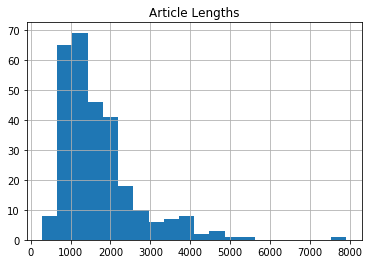

In [18]:
lengths.hist(bins=20)
plt.title('Article Lengths')

Text(0.5, 1.0, 'news publications')

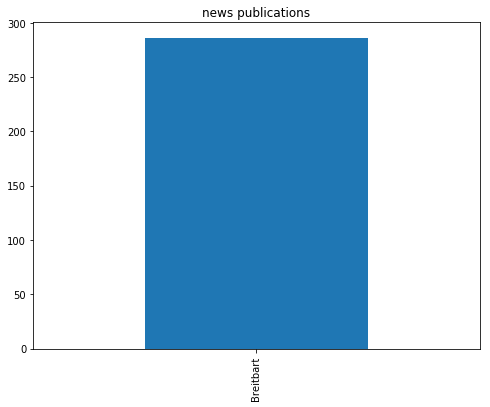

In [19]:
plt.figure(figsize=(8,6))
df.publication.value_counts().plot(kind='bar')
plt.title('news publications')

Text(0.5, 1.0, 'year wise articles')

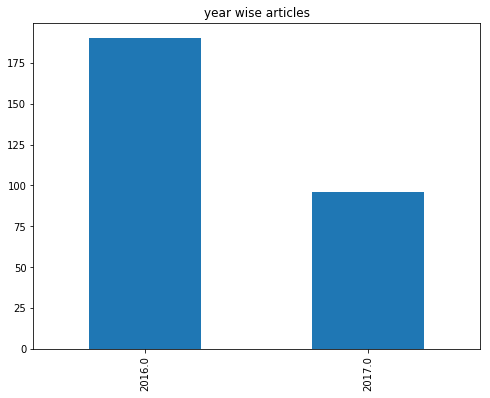

In [20]:
#No of articles by year
plt.figure(figsize=(8,6))
df.year.value_counts().plot(kind='bar')
plt.title('year wise articles')

Text(0.5, 1.0, 'month wise articles')

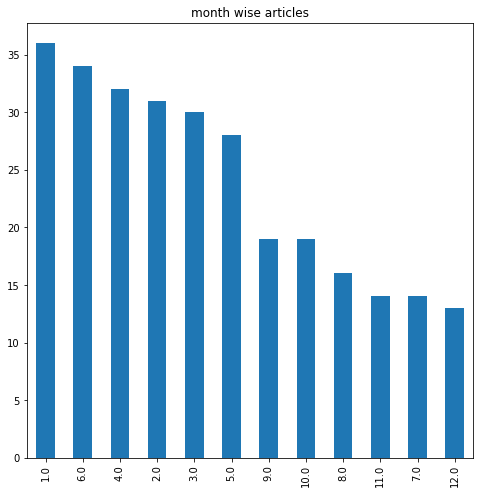

In [21]:
#No of articles by month
plt.figure(figsize=(8,8))
df.month.value_counts().plot(kind='bar')
plt.title('month wise articles')

In [22]:
# Convert to list
data = df.content.values.tolist()

In [23]:
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

In [24]:
# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

In [25]:
# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

In [26]:
pprint(data[:1])

['Dan Weber, founder of the Association of Mature American Citizens (AMAC) '
 'talked with Breitbart News Daily SiriusXM host Alex Marlow on Thursday '
 'regarding his impressions of the current GOP Obamacare replacement bill. '
 '[Said Weber, “What I like about the bill is the positive step in lowering '
 'the cost of health care. ” Weber also said he believes the bill will “bring '
 'the free market back into play with health care. ” Breitbart News Daily airs '
 'on SiriusXM Patriot 125 weekdays from 6:00 a. m. to 9:00 a. m. Eastern. ']


In [27]:
#tokenization
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['dan', 'weber', 'founder', 'of', 'the', 'association', 'of', 'mature', 'american', 'citizens', 'amac', 'talked', 'with', 'breitbart', 'news', 'daily', 'siriusxm', 'host', 'alex', 'marlow', 'on', 'thursday', 'regarding', 'his', 'impressions', 'of', 'the', 'current', 'gop', 'obamacare', 'replacement', 'bill', 'said', 'weber', 'what', 'like', 'about', 'the', 'bill', 'is', 'the', 'positive', 'step', 'in', 'lowering', 'the', 'cost', 'of', 'health', 'care', 'weber', 'also', 'said', 'he', 'believes', 'the', 'bill', 'will', 'bring', 'the', 'free', 'market', 'back', 'into', 'play', 'with', 'health', 'care', 'breitbart', 'news', 'daily', 'airs', 'on', 'siriusxm', 'patriot', 'weekdays', 'from', 'to', 'eastern']]


In [28]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

In [29]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [30]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['dan', 'weber', 'founder', 'of', 'the', 'association', 'of', 'mature', 'american', 'citizens', 'amac', 'talked', 'with', 'breitbart', 'news', 'daily', 'siriusxm', 'host_alex_marlow', 'on', 'thursday', 'regarding', 'his', 'impressions', 'of', 'the', 'current', 'gop', 'obamacare', 'replacement', 'bill', 'said', 'weber', 'what', 'like', 'about', 'the', 'bill', 'is', 'the', 'positive', 'step', 'in', 'lowering', 'the', 'cost', 'of', 'health_care', 'weber', 'also', 'said', 'he', 'believes', 'the', 'bill', 'will', 'bring', 'the', 'free', 'market', 'back', 'into', 'play', 'with', 'health_care', 'breitbart', 'news', 'daily', 'airs', 'on', 'siriusxm_patriot_weekdays', 'from', 'to', 'eastern']


In [31]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in sw] for doc in texts]

In [32]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

In [33]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [34]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [35]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [36]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [37]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['dan', 'weber', 'founder', 'association', 'mature', 'american', 'citizen', 'amac', 'talk', 'breitbart', 'news', 'daily', 'siriusxm', 'host_alex', 'marlow', 'thursday', 'regard', 'impression', 'current', 'gop', 'obamacare', 'replacement', 'bill', 'say', 'weber', 'bill', 'positive', 'step', 'lower', 'cost', 'health_care', 'weber', 'also', 'say', 'believe', 'bill', 'bring', 'free', 'market', 'back', 'play', 'health_care', 'breitbart', 'news', 'daily', 'air', 'siriusxm', 'patriot_weekday', 'eastern']]


In [38]:
type(data_lemmatized)

list

In [39]:
stringList = ' '.join([str(item) for item in data_lemmatized ])

# SENTIMENT ANALYZER

In [40]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
         
sia = SentimentIntensityAnalyzer()
ss = sia.polarity_scores(stringList)
print(ss)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [41]:
if ss["compound"]>=0.5:
    print("positive")
elif ss["compound"]<=-0.5:
    print("negative")
else:
    print("neutral")

neutral


# Word Cloud

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import pandas as pd 

In [43]:
wc=WordCloud(width=800,height=800,background_color='white',min_font_size=10).generate(stringList) 

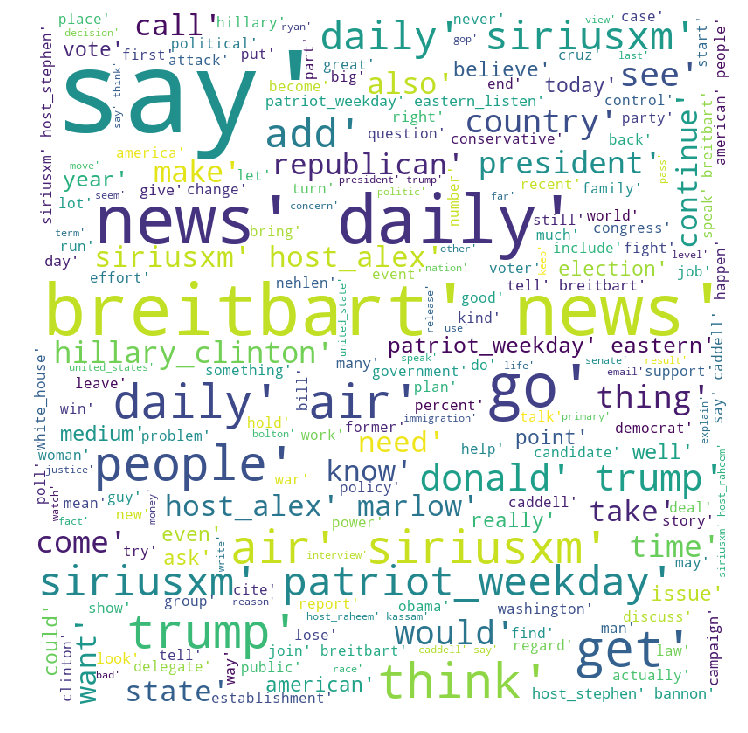

In [44]:
#ploting the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 

In [45]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

In [46]:
# Create Corpus
texts = data_lemmatized

In [47]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
#print(corpus[:1])

In [48]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('air', 1),
  ('also', 1),
  ('amac', 1),
  ('american', 1),
  ('association', 1),
  ('back', 1),
  ('believe', 1),
  ('bill', 3),
  ('breitbart', 2),
  ('bring', 1),
  ('citizen', 1),
  ('cost', 1),
  ('current', 1),
  ('daily', 2),
  ('dan', 1),
  ('eastern', 1),
  ('founder', 1),
  ('free', 1),
  ('gop', 1),
  ('health_care', 2),
  ('host_alex', 1),
  ('impression', 1),
  ('lower', 1),
  ('market', 1),
  ('marlow', 1),
  ('mature', 1),
  ('news', 2),
  ('obamacare', 1),
  ('patriot_weekday', 1),
  ('play', 1),
  ('positive', 1),
  ('regard', 1),
  ('replacement', 1),
  ('say', 2),
  ('siriusxm', 2),
  ('step', 1),
  ('talk', 1),
  ('thursday', 1),
  ('weber', 3)]]

# Models

In [49]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=10,random_state=100,update_every=1,chunksize=100,passes=10,
                                           alpha='auto',per_word_topics=True)                                       

In [50]:
# Print the Keyword in the 20 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"say" + 0.013*"trump" + 0.012*"breitbart" + 0.011*"news" + 0.010*"go" '
  '+ 0.009*"daily" + 0.008*"nehlen" + 0.008*"republican" + 0.007*"siriusxm" + '
  '0.007*"people"'),
 (1,
  '0.016*"breitbart" + 0.014*"ryan" + 0.014*"news" + 0.013*"daily" + '
  '0.012*"siriusxm" + 0.009*"terrorist" + 0.009*"say" + 0.008*"go" + '
  '0.007*"border" + 0.007*"immigration"'),
 (2,
  '0.005*"tancredo" + 0.005*"ice" + 0.005*"kill" + 0.003*"edward" + '
  '0.003*"mayhem" + 0.003*"liable" + 0.003*"cream" + 0.003*"shop" + '
  '0.003*"marten" + 0.003*"hernandez"'),
 (3,
  '0.026*"say" + 0.018*"trump" + 0.015*"go" + 0.014*"news" + 0.013*"breitbart" '
  '+ 0.011*"daily" + 0.010*"people" + 0.010*"think" + 0.009*"donald" + '
  '0.009*"siriusxm"'),
 (4,
  '0.019*"news" + 0.018*"breitbart" + 0.017*"say" + 0.013*"daily" + '
  '0.012*"siriusxm" + 0.007*"people" + 0.007*"get" + 0.006*"go" + 0.006*"air" '
  '+ 0.006*"day"'),
 (5,
  '0.016*"attkisson" + 0.015*"vatan" + 0.011*"file" + 0.010*"sharyl" + '
  

In [51]:
# Visualizing the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.189676 -0.060055       1        1  34.091816
0     -0.155926 -0.103199       2        1  22.836386
4     -0.156002 -0.010791       3        1  22.080179
1     -0.054375  0.235479       4        1   9.139051
9     -0.142273  0.023197       5        1   8.272183
8      0.114636  0.006905       6        1   1.658107
5      0.167185 -0.039633       7        1   1.340138
6      0.146185 -0.019028       8        1   0.271550
2      0.141487 -0.016691       9        1   0.258980
7      0.128758 -0.016184      10        1   0.051606, topic_info=     Category        Freq             Term       Total  loglift  logprob
1347  Default  182.000000          caddell  182.000000  30.0000  30.0000
34    Default  402.000000         siriusxm  402.000000  29.0000  29.0000
137   Default  447.000000            trump  447.000000  28.0000  28.0000
13    Default  462.000000            daily  462.000000  27.0000  27.0000
26    Default  573.000000             news  573.000000  26.0000  26.0000
8     Default  572.000000        breitbart  572.000000  25.0000  25.0000
128   Default  169.000000        president  169.000000  24.0000  24.0000
2043  Default   53.000000             ryan   53.000000  23.0000  23.0000
968   Default  122.000000  hillary_clinton  122.000000  22.0000  22.0000
263   Default   92.000000         election   92.000000  21.0000  21.0000
2154  Default   74.000000           nehlen   74.000000  20.0000  20.0000
28    Default  179.000000  patriot_weekday  179.000000  19.0000  19.0000
24    Default   96.000000           marlow   96.000000  18.0000  18.0000
206   Default  254.000000            think  254.000000  17.0000  17.0000
131   Default  143.000000       republican  143.000000  16.0000  16.0000
33    Default  773.000000              say  773.000000  15.0000  15.0000
20    Default   87.000000        host_alex   87.000000  14.0000  14.0000
15    Default   87.000000          eastern   87.000000  13.0000  13.0000
2697  Default   74.000000             cruz   74.000000  12.0000  12.0000
141   Default  199.000000              add  199.000000  11.0000  11.0000
872   Default   33.000000        terrorist   33.000000  10.0000  10.0000
258   Default  140.000000          country  140.000000   9.0000   9.0000
109   Default  169.000000           donald  169.000000   8.0000   8.0000
0     Default  225.000000              air  225.000000   7.0000   7.0000
2589  Default   52.000000             poll   52.000000   6.0000   6.0000
3     Default  141.000000         american  141.000000   5.0000   5.0000
167   Default  149.000000              see  149.000000   4.0000   4.0000
728   Default   22.000000          veteran   22.000000   3.0000   3.0000
182   Default   31.000000           border   31.000000   2.0000   2.0000
132   Default   57.000000             show   57.000000   1.0000   1.0000
...       ...         ...              ...         ...      ...      ...
2346  Topic10    0.003655         sabotage    0.710210   2.2999  -8.6388
2291  Topic10    0.003655         accident    0.710213   2.2999  -8.6388
2323  Topic10    0.003655         hospital    0.710213   2.2999  -8.6388
2320  Topic10    0.003655           havana    0.710214   2.2999  -8.6388
2340  Topic10    0.003655         patricia    0.710215   2.2999  -8.6388
2339  Topic10    0.003655          offense    0.710216   2.2999  -8.6388
2317  Topic10    0.003655        guatemala    0.710216   2.2999  -8.6388
2308  Topic10    0.003655            debra    0.710222   2.2999  -8.6388
2344  Topic10    0.003655          resolve    0.710223   2.2999  -8.6388
1023  Topic10    0.021999     characterize    6.150570   1.9360  -6.8440
2345  Topic10    0.003655           robbin    0.710238   2.2999  -8.6388
2350  Topic10    0.003655            shove    0.710228   2.2999  -8.6388
2331  Topic10    0.003655      legislature    0.710235   2.2999  -8.6388
2101  Topic10    0.00371

In [52]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -7.63376330038478


In [53]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nLDA Coherence Score: ', coherence_lda)


LDA Coherence Score:  0.49904799384157145


In [54]:
topic_top4words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 4]

df_top4words_stacked = pd.DataFrame(topic_top4words, columns=['topic_id', 'words'])
df_top4words = df_top4words_stacked.groupby('topic_id').agg(', \n'.join)
df_top4words.reset_index(level=0,inplace=True)
df_top4words

,topic_id,words
0,0,"say, \ntrump, \nbreitbart, \nnews"
1,1,"breitbart, \nryan, \nnews, \ndaily"
2,2,"tancredo, \nice, \nkill, \nedward"
3,3,"say, \ntrump, \ngo, \nnews"
4,4,"news, \nbreitbart, \nsay, \ndaily"
5,5,"attkisson, \nvatan, \nfile, \nsharyl"
6,6,"shooting, \nhomeland_security, \ndog, \ndhs"
7,7,"schlapp, \nmood, \neste, \nwarning"
8,8,"comey, \nmichigan, \npresident, \nhoekstra"
9,9,"caddell, \nsay, \nnews, \nbreitbart"


In [55]:
# Build the LSI model
lsi_model =gensim.models.LsiModel(corpus=corpus, id2word=id2word)

In [56]:
# Print the Keyword in the 10 topics
pprint(lsi_model.print_topics())
doc_lsi = lsi_model[corpus]

[(0,
  '0.434*"say" + 0.289*"trump" + 0.282*"news" + 0.268*"breitbart" + 0.216*"go" '
  '+ 0.215*"daily" + 0.189*"siriusxm" + 0.164*"people" + 0.154*"think" + '
  '0.147*"get"'),
 (1,
  '-0.649*"trump" + 0.271*"breitbart" + -0.242*"haye" + -0.216*"donald" + '
  '0.186*"news" + 0.186*"daily" + 0.184*"siriusxm" + -0.099*"weekly_standard" '
  '+ -0.096*"republican" + -0.092*"cruz"'),
 (2,
  '0.285*"say" + 0.247*"vatan" + 0.243*"nehlen" + -0.235*"breitbart" + '
  '-0.232*"news" + -0.217*"trump" + -0.185*"daily" + 0.178*"get" + '
  '-0.176*"siriusxm" + 0.162*"paul_ryan"'),
 (3,
  '0.385*"nehlen" + -0.288*"vatan" + 0.257*"paul_ryan" + 0.245*"ryan" + '
  '-0.202*"think" + -0.177*"get" + -0.161*"review" + 0.156*"district" + '
  '0.148*"percent" + -0.144*"qtc"'),
 (4,
  '-0.321*"haye" + 0.241*"caddell" + 0.225*"say" + 0.171*"donald" + '
  '0.170*"cruz" + -0.168*"vatan" + -0.155*"news" + 0.147*"delegate" + '
  '0.144*"get" + -0.136*"file"'),
 (5,
  '-0.362*"caddell" + -0.282*"vatan" + 0.218*"go"

In [57]:
# Compute Coherence Score
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lsi = coherence_model_lsi.get_coherence()
print('\nLSI Coherence Score: ', coherence_lsi)


LSI Coherence Score:  0.40818791221360745


In [58]:
topic_top4words = [(i, topic) for i, topics in lsi_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 4]

df_top4words_stacked = pd.DataFrame(topic_top4words, columns=['topic_id', 'words'])
df_top4words = df_top4words_stacked.groupby('topic_id').agg(', \n'.join)
df_top4words.reset_index(level=0,inplace=True)
df_top4words.head()

,topic_id,words
0,0,"say, \ntrump, \nnews, \nbreitbart"
1,1,"trump, \nbreitbart, \nhaye, \ndonald"
2,2,"say, \nvatan, \nnehlen, \nbreitbart"
3,3,"nehlen, \nvatan, \npaul_ryan, \nryan"
4,4,"haye, \ncaddell, \nsay, \ndonald"


In [59]:
#Build the hdp model
hdp_model=HdpModel(corpus=corpus, id2word=id2word)

In [60]:
hdp_model.show_topics()

[(0,
  '0.011*say + 0.010*trump + 0.009*news + 0.009*breitbart + 0.009*go + 0.008*daily + 0.007*siriusxm + 0.006*get + 0.005*issue + 0.005*see + 0.004*air + 0.004*thing + 0.004*cop + 0.004*patriot_weekday + 0.004*people + 0.004*know + 0.004*president + 0.003*caddell + 0.003*add + 0.003*donald'),
 (1,
  '0.012*say + 0.005*news + 0.005*breitbart + 0.005*daily + 0.005*get + 0.004*caddell + 0.004*hillary_clinton + 0.004*also + 0.004*percent + 0.004*republican + 0.004*would + 0.004*people + 0.003*siriusxm + 0.003*huma_abedin + 0.003*try + 0.003*trump + 0.003*think + 0.003*believe + 0.002*host + 0.002*cite'),
 (2,
  '0.008*trump + 0.006*donald + 0.005*say + 0.004*news + 0.004*breitbart + 0.004*bossie + 0.003*democrat + 0.003*daily + 0.003*siriusxm + 0.003*go + 0.003*hillary_clinton + 0.003*pac + 0.003*get + 0.003*see + 0.002*strength + 0.002*take + 0.002*ricker + 0.002*discuss + 0.002*think + 0.002*campaign'),
 (3,
  '0.006*say + 0.005*dixon + 0.005*comic_strip + 0.004*caddell + 0.004*medium

In [61]:
# Compute Coherence Score
coherence_model_hdp = CoherenceModel(model=hdp_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_hdp = coherence_model_hdp.get_coherence()
print('\nHDP Coherence Score: ', coherence_hdp)


HDP Coherence Score:  0.7096354558728941


In [62]:
topic_top4words = [(i, topic) for i, topics in hdp_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 4]

df_top4words_stacked = pd.DataFrame(topic_top4words, columns=['topic_id', 'words'])
df_top4words = df_top4words_stacked.groupby('topic_id').agg(', \n'.join)
df_top4words.reset_index(level=0,inplace=True)
df_top4words

,topic_id,words
0,0,"say, \ntrump, \nnews, \nbreitbart"
1,1,"say, \nnews, \nbreitbart, \ndaily"
2,2,"trump, \ndonald, \nsay, \nnews"
3,3,"say, \ndixon, \ncomic_strip, \ncaddell"
4,4,"say, \nkoch, \nthink, \ntrump"
5,5,"people, \nsay, \nnews, \nbolton"
6,6,"world, \nmaness, \ncountry, \nyear"
7,7,"nehlen, \nsay, \nryan, \nsaturday"
8,8,"supporter, \npodesta, \ntrump, \nviolence"
9,9,"issue, \nsay, \nrichwine, \nimmigrant"


# Model scores

In [63]:
def evaluate_bar_graph(coherences,indices):
    assert len(coherences)==len(indices)
    n=len(coherences)
    x=np.arange(n)
    plt.bar(x,coherences,width=0.2,tick_label=indices,align='center')
    plt.xlabel('models')
    plt.ylabel('coherence scores')

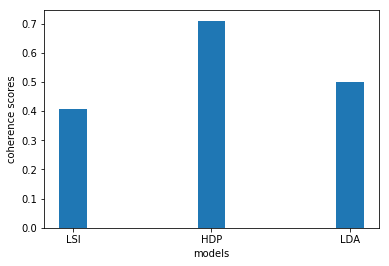

In [64]:
evaluate_bar_graph([coherence_lsi,coherence_hdp,coherence_lda],['LSI','HDP','LDA'])